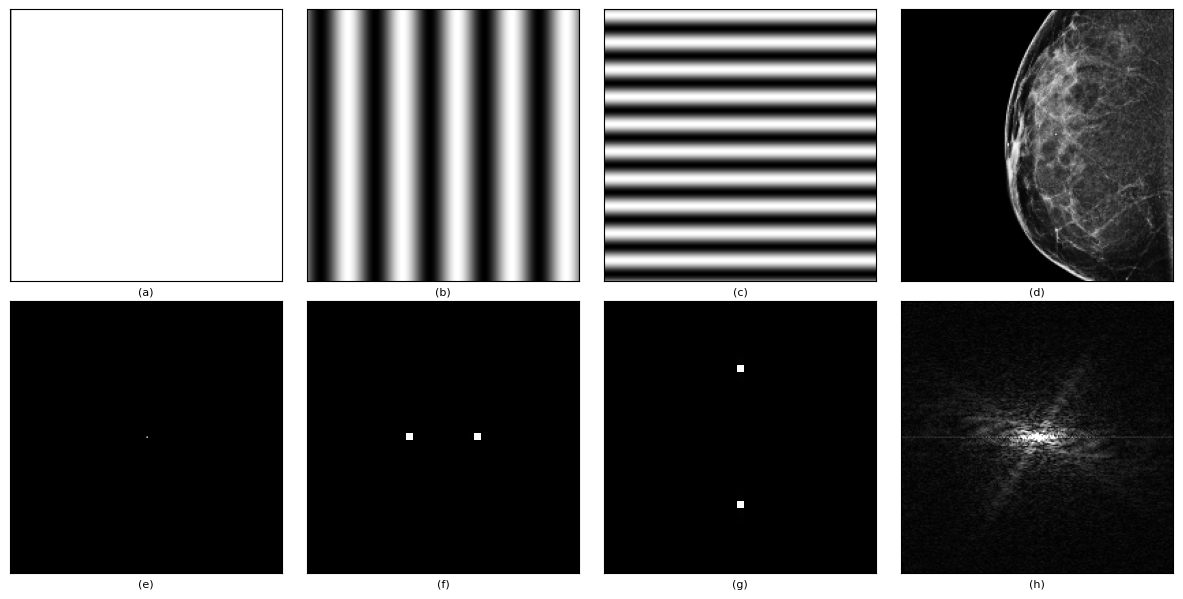

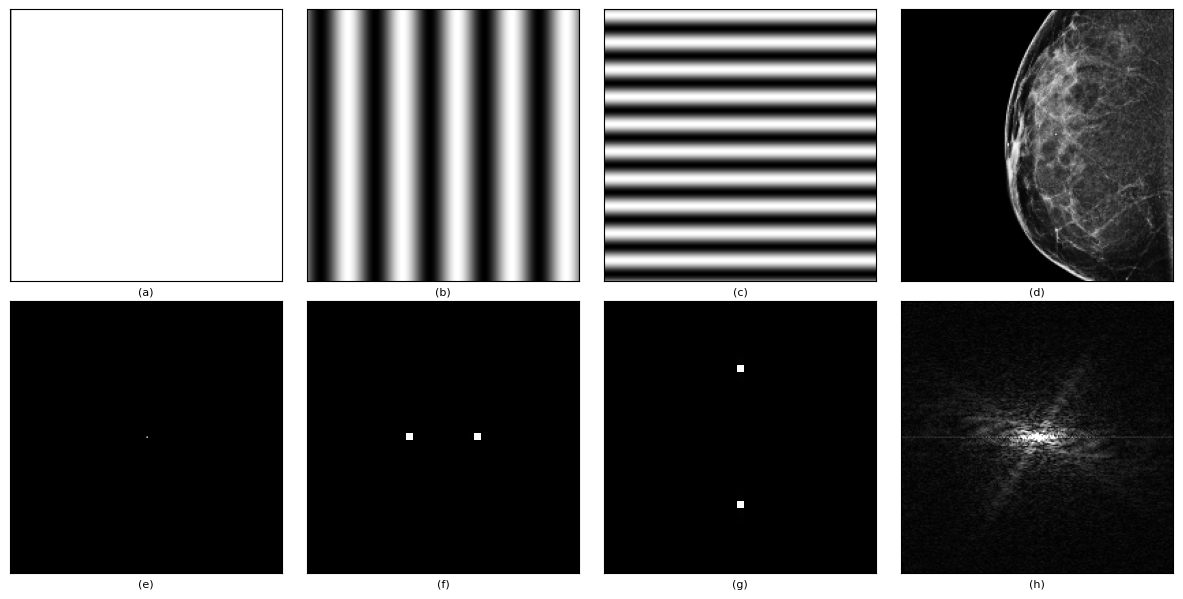

In [1]:
import os
if 'jbook' in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../../../..")))
import cv2
import matplotlib.pyplot as plt
import numpy as np
from bcd.utils.image import convert_uint8
from myst_nb import glue

FP_WHITE = "jbook/figures/frequency_white.jpg"
FP_MMG = "jbook/figures/mammogram.png"

def create_image(wavelength = 200, angle = 0):
    x = np.arange(-500,501,1)
    X,Y = np.meshgrid(x,x)
    return np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

def get_image(fp: str, size: int = 200):
    img = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (size,size))

def transform_image(img, log: bool = False, clip: bool = False):
    # Shift the input
    img = np.fft.ifftshift(img)
    # Compute fourier transformation
    img = np.fft.fft2(img)
    # Shift the zero-frequency to the center
    img = np.fft.fftshift(img)
    # Compute amplitude
    img = np.abs(img)
    # Convert to log to scale the image
    if log:
        img = np.log(img)
    # Clip the image for photos.
    if clip:
        img = np.clip(img, a_min=0, a_max=50000)

    return img


img_white = get_image(fp=FP_WHITE)
img_hline = create_image()
img_vline = create_image(angle=2 * np.pi / 4, wavelength=100)
img_mmg = get_image(fp=FP_MMG)

img_white_fft = transform_image(img_white)
img_hline_fft = transform_image(img_hline)
img_vline_fft = transform_image(img_vline)
img_mmg_fft = transform_image(img_mmg, clip=True)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
_ = axes[0,0].imshow(img_white, cmap='gray')
_ = axes[0,1].imshow(img_hline, cmap='gray')
_ = axes[0,2].imshow(img_vline, cmap='gray')
_ = axes[0,3].imshow(img_mmg, cmap='gray')

_ = axes[1,0].imshow(img_white_fft, cmap='gray')
_ = axes[1,1].imshow(img_hline_fft, cmap='gray')
_ = axes[1,1].set_xlim([480,520])
_ = axes[1,1].set_ylim([520,480])
_ = axes[1,2].imshow(img_vline_fft, cmap='gray')
_ = axes[1,2].set_xlim([520,480])
_ = axes[1,2].set_ylim([480,520])
_ = axes[1,3].imshow(img_mmg_fft, cmap='gray')

labels = np.array([["(a)", "(b)", "(c)", "(d)"], ["(e)", "(f)", "(g)", "(h)"]])
for i in range(2):
    for j in range(4):
        _ = axes[i,j].set_xlabel(labels[i,j])
        _ = axes[i,j].set_xticks([])
        _ = axes[i,j].set_yticks([])

plt.tight_layout()

glue("fft", fig)

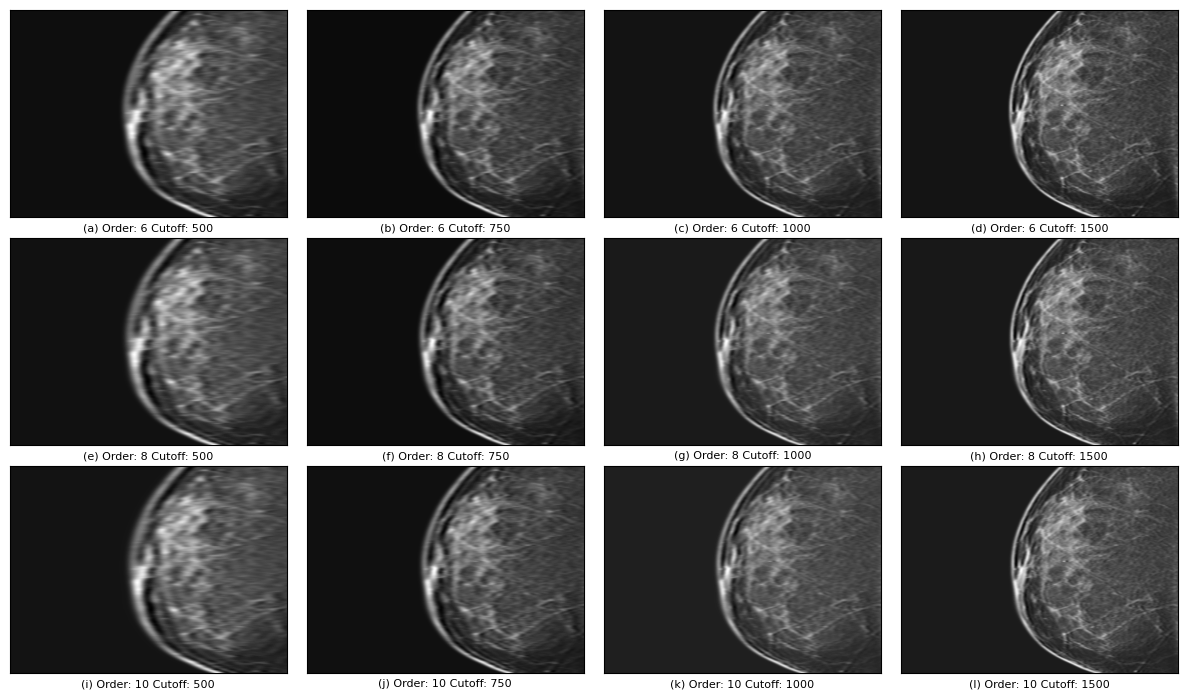

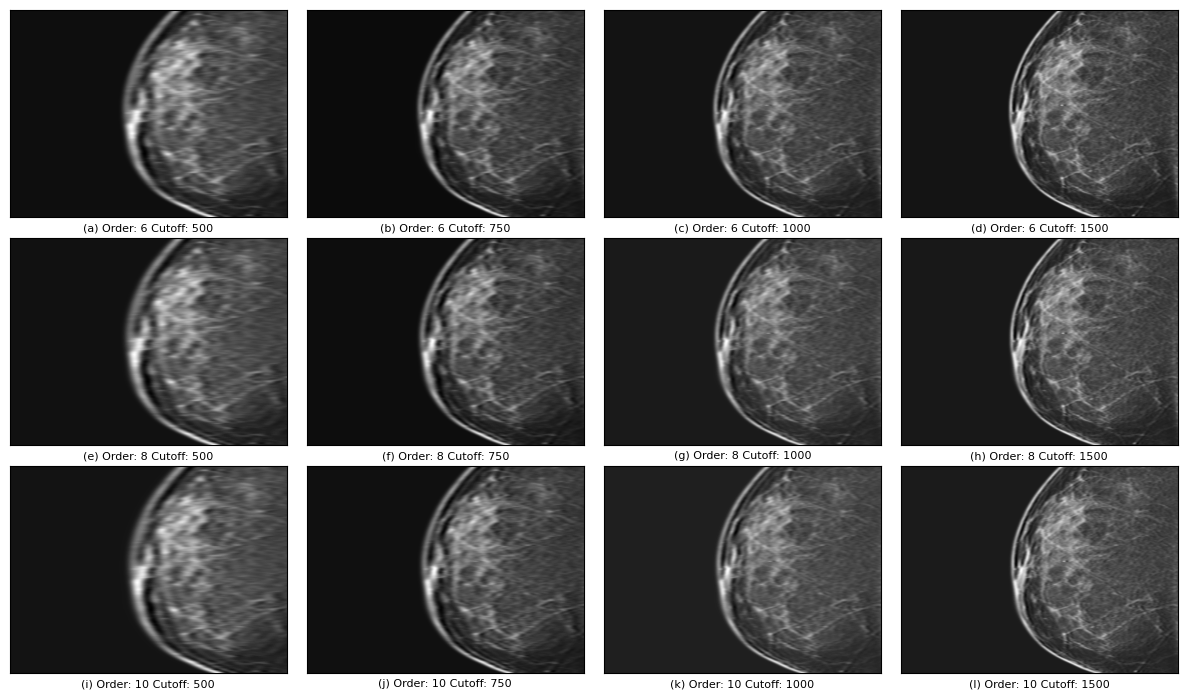

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2

FP_IMAGE = "jbook/figures/mammogram.png"

fs = 44100 # Sampling rate
fc = np.array([500,750,1000,1500])  # Cutoff Frequencies
N = np.array([6,8,10]) # Order values

f = cv2.imread(FP_IMAGE, cv2.IMREAD_GRAYSCALE)

labels = np.array([["(a)", "(b)", "(c)", "(d)"], ["(e)", "(f)", "(g)", "(h)"], ["(i)", '(j)', "(k)", "(l)"]])

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,7))

for i in range(len(N)):
    for j in range(len(fc)):
        b, a = scipy.signal.butter(N=N[i], Wn=fc[j], btype='lowpass', analog=False, fs=fs)
        y = scipy.signal.lfilter(b,a,f)
        _ = axes[i,j].imshow(y, cmap='gray')
        label = f"{labels[i,j]} Order: {N[i]} Cutoff: {fc[j]}"
        _ = axes[i,j].set_xlabel(label)
        _ = axes[i,j].set_xticks([])
        _ = axes[i,j].set_yticks([])
plt.tight_layout()

glue("butterworth", fig)